## Image recognition using 4 different classes from the QuickDraw dataset

In [30]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split

In [71]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import backend as K


### Loading the data from google drive

In [32]:
from google.colab import drive
drive.mount('/content/drive')

dog = np.load('/content/drive/My Drive/MAIS/data/dog.npy')
crocodile = np.load('/content/drive/My Drive/MAIS/data/crocodile.npy')
cow = np.load('/content/drive/My Drive/MAIS/data/cow.npy')
cat = np.load('/content/drive/My Drive/MAIS/data/cat.npy')

print(dog.shape)
print(cat.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(152159, 784)
(123202, 784)


In [33]:
# Helper functions

def plot_images(images_arr, rows, cols, title):
  '''
  Function to plot the numpy bitmaps (28 x 28) images stored in an np array
  '''
  fig, axes = plt.subplots(figsize=(rows, cols))
  axes.axis('off')
  plt.title(title)
  for i in list(range(0, min(len(images_arr), (rows*cols)))):
    x = fig.add_subplot(rows, cols, i+1)
    # 784 because 28 * 28 = 784, so it allows to reshape
    img = plt.imshow(images_arr[i, :784].reshape((28, 28)), interpolation='nearest')
    plt.xticks([])
    plt.yticks([])



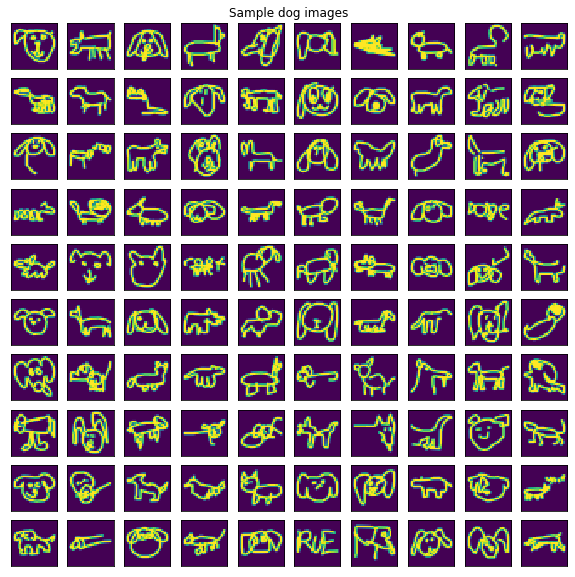

In [34]:
plot_images(dog,10, 10, "Sample dog images")

Random Forests

In [35]:
# Adding columns as labels to images array
# 0 -> dog
# 1 -> crocodile
# 2 -> cow
# 3 -> cat
dog = np.c_[dog, np.zeros(len(dog))]
crocodile = np.c_[crocodile, np.ones(len(crocodile))]
cow = np.c_[cow, np.full(len(cow), 2)]
cat = np.c_[cat, np.full(len(cat), 3)]

# features and labels
X = np.concatenate((dog[:5000,:-1], crocodile[:5000,:-1], cow[:5000,:-1], cat[:5000, :-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((dog[:5000,-1], crocodile[:5000,-1], cow[:5000, -1], cat[:5000, -1]), axis=0).astype('float32') # the last column



X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.5,random_state=0)


In [36]:
clf_random_forests = RandomForestClassifier()
clf_random_forests.fit(X_train, y_train)
print(clf_random_forests)
y_pred = clf_random_forests.predict(X_test)
accuracy_score_random_forests = accuracy_score(y_test, y_pred)
print(accuracy_score_random_forests)

RandomForestClassifier()
0.6969


SVM

In [37]:
svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)
print(svm_clf)
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(accuracy_svm)


LinearSVC()
0.6177


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


CNN

In [38]:
y_train_CNN = np_utils.to_categorical(y_train)
y_test_CNN = np_utils.to_categorical(y_test)
classes = y_test_CNN.shape[1]
print(classes)

4


In [46]:
# Reshaping the data into image dimensions

X_train_CNN = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_CNN = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [47]:
def CNN():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [50]:
np.random.seed(0)
model_cnn = CNN()
model_cnn.fit(X_train_CNN, y_train_CNN, validation_data=(X_test_CNN, y_test_CNN), epochs=20, batch_size=200)
scores = model_cnn.evaluate(X_test_CNN, y_test_CNN, verbose=0)
print('Final CNN accuracy: ', scores[1])

Epoch 1/20
50/50 [==============================] - 8s 149ms/step - loss: 1.1175 - accuracy: 0.5206 - val_loss: 0.9252 - val_accuracy: 0.6100
Epoch 2/20
50/50 [==============================] - 7s 145ms/step - loss: 0.8096 - accuracy: 0.6764 - val_loss: 0.6871 - val_accuracy: 0.7394
Epoch 3/20
50/50 [==============================] - 7s 145ms/step - loss: 0.6874 - accuracy: 0.7299 - val_loss: 0.6354 - val_accuracy: 0.7608
Epoch 4/20
50/50 [==============================] - 7s 146ms/step - loss: 0.6309 - accuracy: 0.7549 - val_loss: 0.6349 - val_accuracy: 0.7515
Epoch 5/20
50/50 [==============================] - 7s 146ms/step - loss: 0.6081 - accuracy: 0.7651 - val_loss: 0.5994 - val_accuracy: 0.7692
Epoch 6/20
50/50 [==============================] - 7s 146ms/step - loss: 0.5856 - accuracy: 0.7696 - val_loss: 0.5859 - val_accuracy: 0.7784
Epoch 7/20
50/50 [==============================] - 7s 146ms/step - loss: 0.5553 - accuracy: 0.7818 - val_loss: 0.5606 - val_accuracy: 0.7872
Epoch 

In [79]:
model_cnn.summary()
# serialize weights to HDF5
model_cnn.save_weights('/content/drive/My Drive/MAIS/model.h5')

plot_model(model_cnn, to_file='/content/drive/My Drive/MAIS/model.png', show_shapes=True, show_layer_names=True)
loss, accuracy = scores


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 15)          0         
                                                                 
 flatten_2 (Flatten)         (None, 375)              

In [66]:
y_test_arg = np.argmax(y_test_CNN, axis=1)
y_pred_cnn = np.argmax(model_cnn.predict(X_test_CNN), axis=1)
#y_pred_cnn = model_cnn.predict(X_test_CNN, verbose=0)
acc_cnn = accuracy_score(y_test_arg, y_pred_cnn)
print(f"CNN accuracy {acc_cnn}")

CNN accuracy 0.8068


In [67]:
cnf_matrix = confusion_matrix(y_test_arg, y_pred_cnn)

In [68]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 5)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1812   76  353  201]
 [ 150 2236   75   79]
 [ 346   31 2037   85]
 [ 341   44  151 1983]]


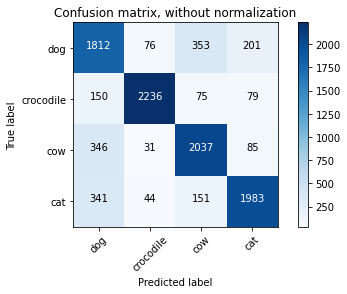

In [69]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['dog','crocodile', 'cow', 'cat'],
                      title='Confusion matrix, without normalization')

plt.show()